# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [141]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [142]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [143]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [144]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [145]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [146]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [147]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [148]:
# Shape of images
print(train_images.shape, test_images.shape)


(24958, 64, 64, 3) (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [149]:
# Shape of labels 
print(train_labels.shape, test_labels.shape)

(24958,) (2600,)


####<b> Observations and insights:
We can see the 4D training and test images and also that the number of images in the test set is approximately 10% of the number of images in the training set.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [150]:
# Try to use min and max function from numpy
print(f'minimum {train_images.min()} and maximum {train_images.max()} of pixel values from train set')
print(f'minimum {test_images.min()} and maximum {test_images.max()} of pixel values from test set ')


minimum 0 and maximum 255 of pixel values from train set
minimum 0 and maximum 255 of pixel values from test set 


####<b> Observations and insights:
The range of pixels identified for both the training set and the test set is from 0-255.

This could be important information for future normalizations.



###<b> Count the number of values in both uninfected and parasitized 

In [151]:
# Try to use value_counts to count the values
y_train = pd.DataFrame(train_labels, columns=['Labels'])
y_train.value_counts()

y_test = pd.DataFrame(test_labels, columns=['Labels'])
y_test.value_counts()

print(f'For test values\n {y_test.value_counts()}\n For train values\n {y_train.value_counts()}')


For test values
 Labels
0         1300
1         1300
dtype: int64
 For train values
 Labels
1         12582
0         12376
dtype: int64


###<b>Normalize the images

In [152]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: 
It can be observed that both the training and test sets have about 50% infected and 50% uninfected, which is a good balance of information for the ML methods.

###<b> Plot to check if the data is balanced

For train set:
 AxesSubplot(0.125,0.125;0.775x0.755)
 


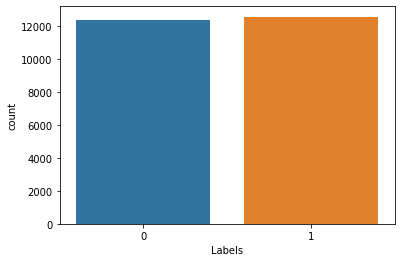

In [153]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

print(f'For train set:\n {sns.countplot(x=y_train["Labels"])}\n ')


For test set:
 AxesSubplot(0.125,0.125;0.775x0.755)
 


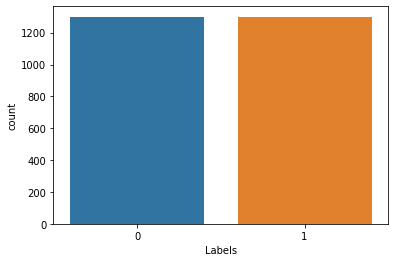

In [154]:
print(f'For test set:\n {sns.countplot(x=y_test["Labels"])}\n ')

####<b> Observations and insights: 
It can be observed that both the training and test sets have about 50% infected and 50% uninfected, which is a good balance of information for the ML methods.

### <b>Data Exploration</b>
Let's visualize the images from the train data

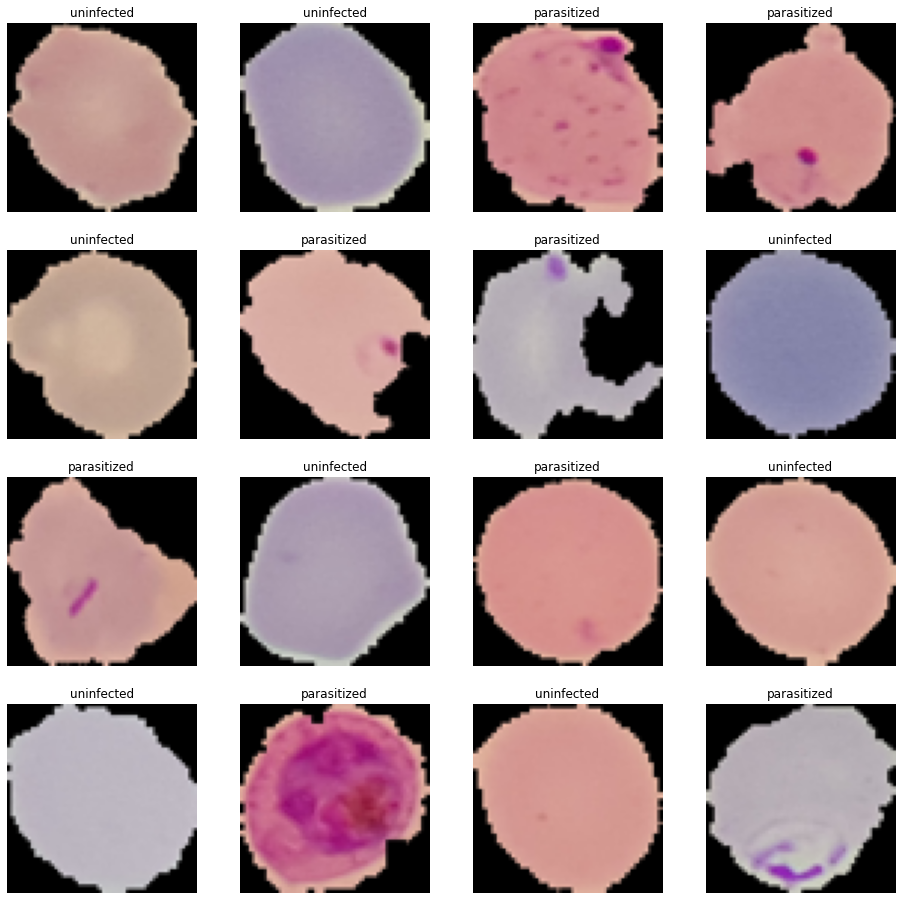

In [155]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: 
almost all infected cells have a strong color contrast (perhaps corresponding to the parasite) with respect to the color of the cell body.



###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

In [156]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate



###<b> Plotting the mean images for parasitized and uninfected

In [157]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

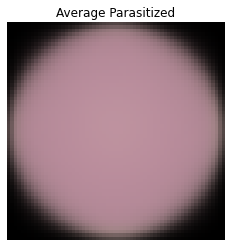

In [170]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

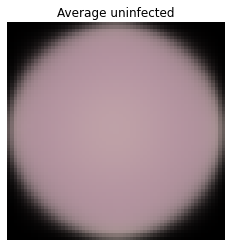

In [171]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')   # find the mean



####<b> Observations and insights: 
Infected cells show on mean a stronger color than uninfected cells.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [160]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

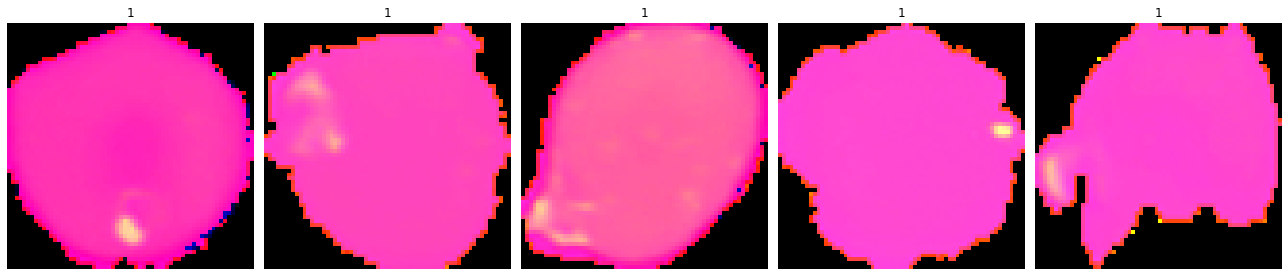

In [161]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

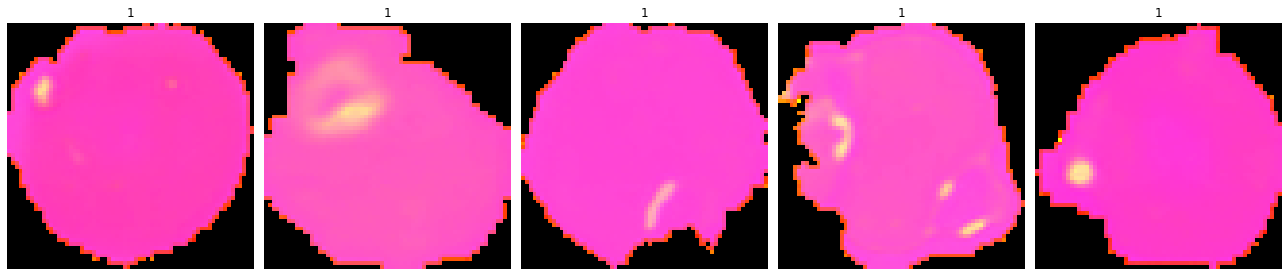

In [169]:
# Similarly you can visualize for the images in the test data
gfx2=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  e = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx2.append(e)

gfx2 = np.array(gfx2)

viewimage2 = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage2):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: 
By changing the images to HSV format, an improvement in the color contrast of the infected cells can be observed with respect to the original format. 

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [163]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

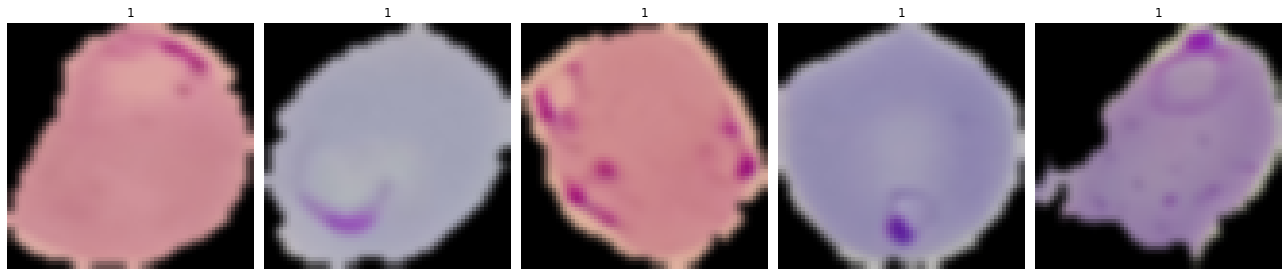

In [164]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [165]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx2 = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  f = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx2.append(f)

gbx2 = np.array(gbx2)

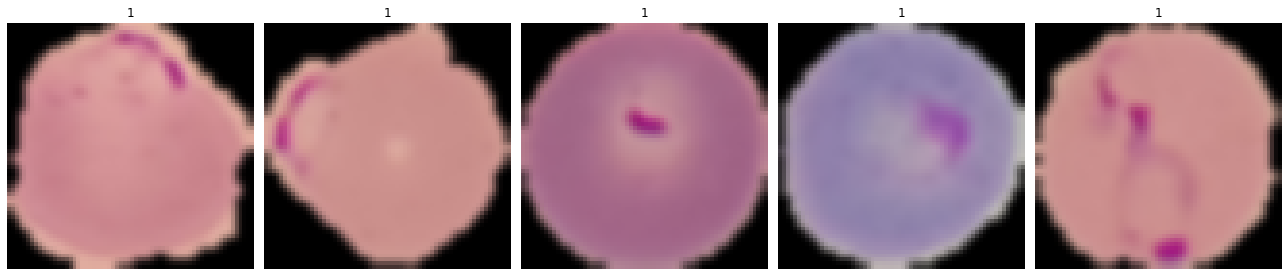

In [166]:
viewimage2 = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage2):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights:
Degrading image quality as the Gaussian Blurring methodology does can help make our machine learning models more resilient to the harsh realities they will encounter in real-world situations.
box blurring method and a differential privacy-based pixilation method can also be used

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
techniques such as logistic regression and CNN can be explored. 
In the case of logistic regression the idea that could work could be based on the fact that the color mean in infected cells is higher than that of uninfected cells, the categorical approach could be implemented, decreasing the false negative rate and compromising as little as possible the precision and recall, since this is a public health problem.

CNN could be very useful because with this technique we could analyze the whole image (not only focus on the color mean), and also because of the amount of information we have in the training set (24958 pictures) CNNs usually show better results than other ML techniques.

**Overall solution design:** What is the potential solution design?<br>

Based on the amount of information and robustness of the method, the potential solution is the use of CNN.


**Measures of success:** What are the key measures of success to compare different techniques?<br>

precision
recalll
false negative rate

#<b>Milestone 2

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

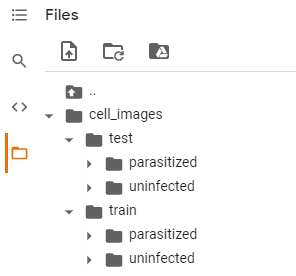

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels =tf.keras.utils.to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)


### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 13s 8ms/step - loss: 0.4001 - accuracy: 0.8097 - val_loss: 0.2741 - val_accuracy: 0.8696
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1186 - accuracy: 0.9574 - val_loss: 0.0805 - val_accuracy: 0.9866
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0916 - accuracy: 0.9692 - val_loss: 0.0793 - val_accuracy: 0.9892
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0788 - accuracy: 0.9733 - val_loss: 0.0766 - val_accuracy: 0.9872
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0725 - accuracy: 0.9748 - val_loss: 0.0777 - val_accuracy: 0.9830
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0697 - accuracy: 0.9756 - val_loss: 0.0512 - val_accuracy: 0.9880
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0672 - accuracy: 0.9776 - val_loss: 0.0672 - val_accuracy: 0.9872
Epoch

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9762

 Test_Accuracy:- 0.9761538505554199


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



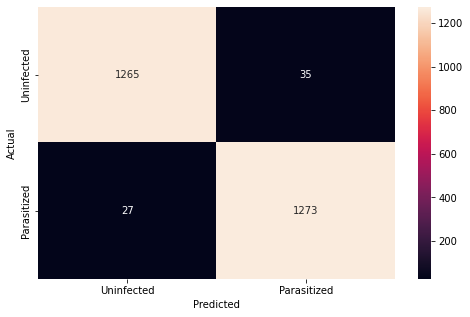

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

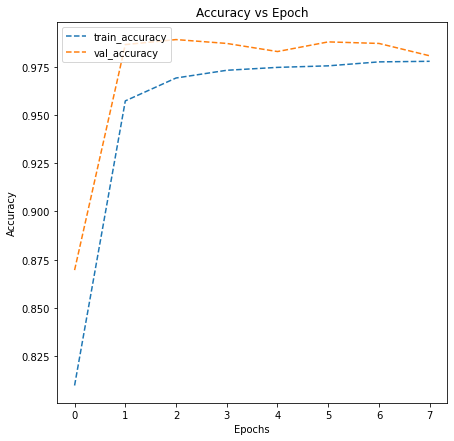

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# Build the model here and add new layers

# Adding first conv layer with 32 filters and kernel size 2 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of cell's images

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Dense(100, activation = "relu"))

model1.add(Dense(50, activation = "relu"))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)       

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
             

<b>Fit and Train the model

In [ ]:
history1= model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 9ms/step - loss: 0.3987 - accuracy: 0.8111 - val_loss: 0.1959 - val_accuracy: 0.9563
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1038 - accuracy: 0.9669 - val_loss: 0.0953 - val_accuracy: 0.9794
Epoch 3/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0864 - accuracy: 0.9722 - val_loss: 0.0855 - val_accuracy: 0.9764
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0802 - accuracy: 0.9742 - val_loss: 0.0769 - val_accuracy: 0.9846
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0711 - accuracy: 0.9761 - val_loss: 0.0790 - val_accuracy: 0.9790
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.0779 - val_accuracy: 0.9802


###<b> Evaluating the model

In [ ]:
def accuaracy(model1):
  accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
  print('\n', 'Test_Accuracy:-', accuracy[1])

In [ ]:
accuaracy(model1)

82/82 [==============================] - 1s 5ms/step - loss: 0.0770 - accuracy: 0.9738

 Test_Accuracy:- 0.9738461375236511


<b> Plotting the confusion matrix

In [ ]:
def plot_cm (model):

  pred = model.predict(test_images)

  pred = np.argmax(pred, axis = 1) 

  y_true = np.argmax(test_labels, axis = 1)

  # Printing the classification report
  print(classification_report(y_true, pred))

  #  Plotting the heatmap using confusion matrix
  cm = confusion_matrix(y_true, pred)

  plt.figure(figsize = (8, 5))

  sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

  plt.ylabel('Actual')

  plt.xlabel('Predicted')

  plt.show()

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1300
           1       0.97      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



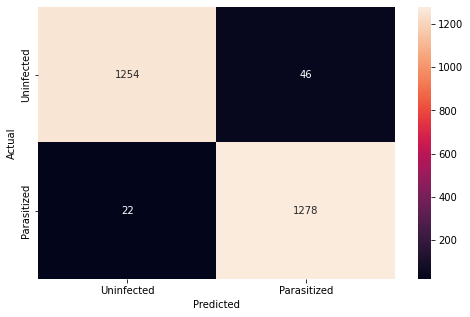

In [ ]:
plot_cm(model1)

<b> Plotting the train and the validation curves

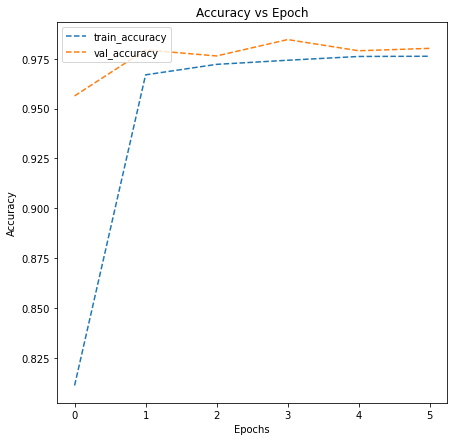

In [ ]:
plot_accuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), padding = "same", input_shape = (64, 64, 3)))

model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of output of first conv layer

model2.add(MaxPooling2D(pool_size = 2))

#model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Conv2D( 32, (3,3), padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

#model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Conv2D(32, (3,3), padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

#model2.add(Dropout(0.2))

model2.add(BatchNormalization())

model2.add(Dense(100))

model2.add(LeakyReLU(0.1))

model2.add(Dense(50))

model2.add(LeakyReLU(0.1))

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))

#model2.add(Dropout(0.4))

model2.add(BatchNormalization())

model2.add(Dense(2, activation = "softmax")) 

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''
callbacks = [EarlyStopping(monitor = 'val_loss', patience =2 ),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 9ms/step - loss: 0.2310 - accuracy: 0.9056 - val_loss: 0.0931 - val_accuracy: 0.9848
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0813 - accuracy: 0.9731 - val_loss: 0.0438 - val_accuracy: 0.9864
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0721 - accuracy: 0.9751 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0699 - accuracy: 0.9772 - val_loss: 0.0901 - val_accuracy: 0.9902
Epoch 5/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0603 - accuracy: 0.9795 - val_loss: 0.0364 - val_accuracy: 0.9868
Epoch 6/20
624/624 [==============================] - 7s 12ms/step - loss: 0.0610 - accuracy: 0.9785 - val_loss: 0.0695 - val_accuracy: 0.9724
Epoch 7/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0550 - accuracy: 0.9809 - val_loss: 0.0490 - val_accuracy: 0.9846


<b>Plotting the train and validation accuracy

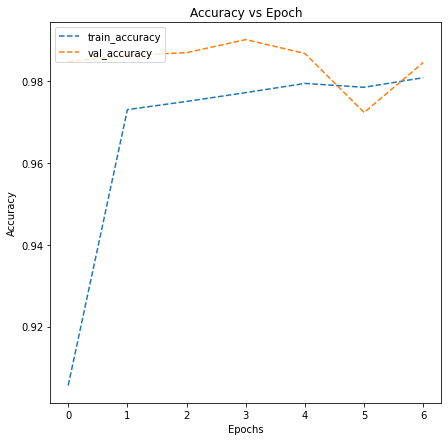

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0615 - accuracy: 0.9831

 Test_Accuracy:- 0.9830769300460815


<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



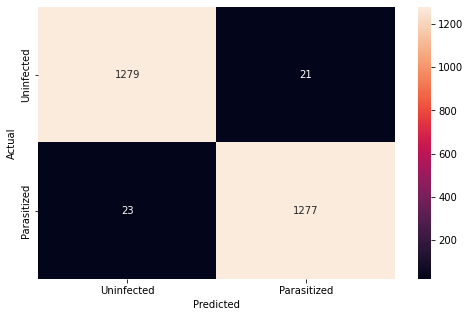

In [ ]:
plot_cm(model2)

####<b>Observations and insights: 

Two more layers were added to the base model before the Flatten layer (resulted in model 1), the first of 100 neurons and the second of 50 neurons. It could be observed that the false positives (it is desired to minimize this variable) decreased slightly, from 27 to 22 false negatives, however the false positives increased slightly from 35 to 46.

We tried to improve the performance of model 1 (base model + 2 layers) by replacing the "relu" activation by the "LeakyRelu" activation and also by incorporating "BatchNormalization" instead of "Dropout", which resulted in model 2.

An improvement in the performance of model 2 could be observed,
The recall value for false positives increased from 0.96 to 0.98 and the recall value for false negatives remained constant at 0.98. The f1-Score value for false positives and false negatives increased from 0.97 to 0.98. 
One behavior that is important to take into account is the evolution of accuracy as a function of epochs, we can see a fluctuating behavior especially in the validation curve which was not observed in model 1, suggesting instability of the model, which could trigger problems to converge.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

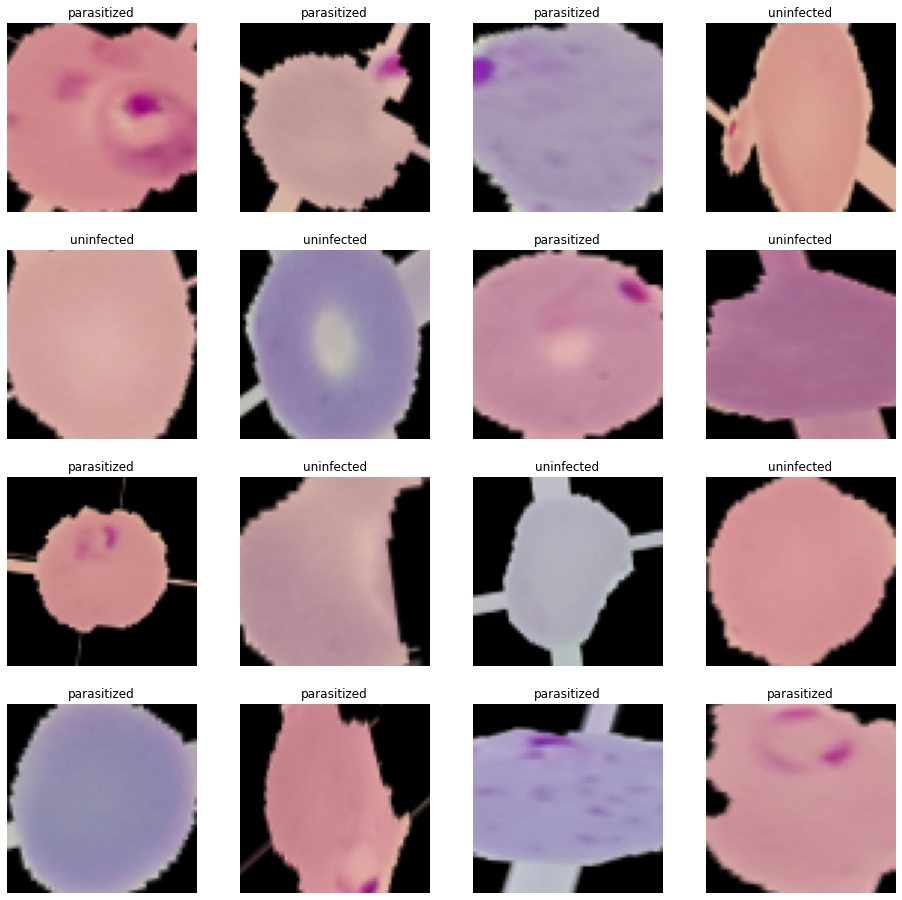

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

###<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Dense(100, activation = "relu"))

model3.add(Dense(50, activation = "relu"))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax"))

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)       

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 23s 70ms/step - loss: 0.6168 - accuracy: 0.6502 - val_loss: 0.1926 - val_accuracy: 0.9325
Epoch 2/20
312/312 [==============================] - 23s 75ms/step - loss: 0.2394 - accuracy: 0.9029 - val_loss: 0.1359 - val_accuracy: 0.9445
Epoch 3/20
312/312 [==============================] - 47s 149ms/step - loss: 0.1894 - accuracy: 0.9342 - val_loss: 0.1251 - val_accuracy: 0.9708
Epoch 4/20
312/312 [==============================] - 23s 75ms/step - loss: 0.1724 - accuracy: 0.9424 - val_loss: 0.0919 - val_accuracy: 0.9750
Epoch 5/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1625 - accuracy: 0.9473 - val_loss: 0.0867 - val_accuracy: 0.9756
Epoch 6/20
312/312 [==============================] - 23s 74ms/step - loss: 0.1549 - accuracy: 0.9478 - val_loss: 0.0813 - val_accuracy: 0.9754
Epoch 7/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1579 - accuracy: 0.9475 - val_loss: 0.0867 - val_accuracy

###<B>Evaluating the model

<b>Plot the train and validation accuracy

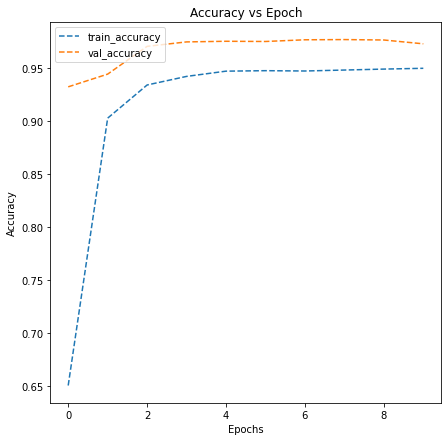

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9769

 Test_Accuracy:- 0.9769230484962463


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



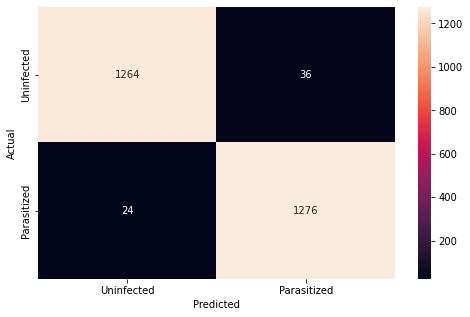

In [ ]:
plot_cm(model3)

####<b>Observations and insights:
The performance of model 1 was improved by incorporating the data augmentation tool, resulting in model 3. Since it is well known that it is a tool that allows us to increase our training dataset to improve accuracy, generalization, and control overfitting.

An improvement in the performance of model 3 was observed,
The recall value for false positives increased from 0.96 to 0.97 and the recall value for false negatives remained constant at 0.98. The f1-Score value for false positives and negatives went from 0.97 to 0.98. 
If we observe the evolution of accuaracy as a function of epochs, we can appreciate a behavior without abrupt fluctuations in both curves (validation and train), which suggests stability of the model, which could indicate that the model could have less difficulties in converging.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = True

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model 
model4.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_images, train_labels, epochs = 10, callbacks = callbacks, batch_size =32, validation_split = 0.2, verbose = 1)



Epoch 1/10
624/624 [==============================] - 38s 57ms/step - loss: 0.1482 - accuracy: 0.9360 - val_loss: 0.2443 - val_accuracy: 0.9189
Epoch 2/10
624/624 [==============================] - 35s 55ms/step - loss: 0.0722 - accuracy: 0.9744 - val_loss: 0.0469 - val_accuracy: 0.9858
Epoch 3/10
624/624 [==============================] - 34s 55ms/step - loss: 0.0719 - accuracy: 0.9759 - val_loss: 0.0352 - val_accuracy: 0.9904
Epoch 4/10
624/624 [==============================] - 34s 55ms/step - loss: 0.0659 - accuracy: 0.9766 - val_loss: 0.0329 - val_accuracy: 0.9922
Epoch 5/10
624/624 [==============================] - 34s 55ms/step - loss: 0.0579 - accuracy: 0.9795 - val_loss: 0.0848 - val_accuracy: 0.9746
Epoch 6/10
624/624 [==============================] - 34s 55ms/step - loss: 0.0572 - accuracy: 0.9801 - val_loss: 0.0280 - val_accuracy: 0.9936
Epoch 7/10
624/624 [==============================] - 34s 54ms/step - loss: 0.0552 - accuracy: 0.9798 - val_loss: 0.0341 - val_accuracy:

<b>Plot the train and validation accuracy

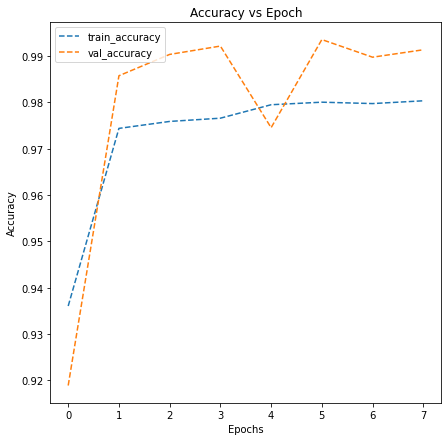

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

*   It was decided to test the pre-trained VGG-16 (transfer learning) model for our imaging system.

We noticed a slight increase in the recall for false positives with respect to model 3 from 0.97 to 0.99, but decreased the recall for false negatives from 0.98 to 0.97, maintaining an f1-scpre of 0.98 for both models.

However, if we observe the behavior of the accuaracy variable as a function of epochs, we can identify a fluctuating behavior in the validation curve indicating a possible instability of the model, which may cause it not to converge in different conditions.

The decrease in the performance of model 4 with respect to model 3 may be caused by different factors. One of the most affecting factors is that the VGG-16 model was not created for this particular application and some layers may not be helpful for this application.

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data

accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 2s 18ms/step - loss: 0.0432 - accuracy: 0.9838

 Test_Accuracy:- 0.983846127986908


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



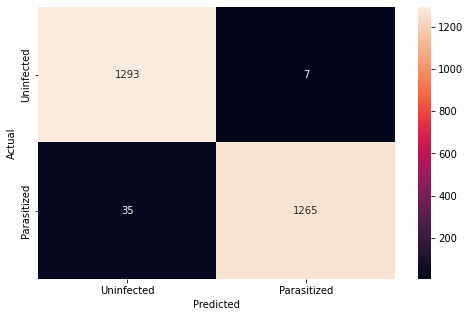

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
plot_cm(model4)

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: 

The best performing model for the conditions studied is model 3.
However, it is suggested that the VGG-16 (transfer learning) model be studied in greater depth to elucidate its advantages and limitations in this application.

Another aspect to study is the elimination of dense layers in the model, especially the ones after the Conv2D layers. This is based on the hypothesis that we have enough parameters with the three Conv2D layers in model 3 to have an efficient model. this could decrease computational time and prevent overffiting. 


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

###<b> Mounting the Drive

In [2]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<b>Loading libraries</b>

In [3]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

load the data

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [7]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [9]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')
train_images.shape

(24958, 64, 64, 3)

###<B>One Hot Encoding on the train and test labels

In [10]:
# Encoding Train Labels
train_labels =tf.keras.utils.to_categorical(train_labels,2)

# Similarly let us try to encode test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)

train_labels.shape


(24958, 2)

### **Final Model**

**Note:** The Final Model was developed based on the hypothesis that we have enough parameters with the three Conv2D layers in model 3 to have an efficient model and this could decrease computational time and prevent overffiting.

In addition, the train images were modified with the Gaussian Blurring technique in order to make our model more robust. Degrading image quality as the Gaussian Blurring methodology does can help make our machine learning models more resilient to the harsh realities they will encounter in real-world situations

Gaussian Blurring on train data

In [11]:
import cv2
gbx = []  # To hold the blurred images

for i in np.arange(0, 24958, 1):

 b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

 gbx.append(b)

gbx = np.array(gbx)

gbx.shape

(24958, 64, 64, 3)

###<b> Importing the required libraries for building and training our Model

In [12]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [61]:
# Creating sequential model
model3 = Sequential()

# Build the model here

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Flatten())

model3.add(Dense(2, activation = "softmax"))

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 32)        4128      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 8, 8, 32)       

###<b> Compiling the model

<b> Using Callbacks 

In [62]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [63]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model3.fit(gbx, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.5223 - accuracy: 0.7543 - val_loss: 0.5719 - val_accuracy: 0.8057
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1608 - accuracy: 0.9471 - val_loss: 0.2243 - val_accuracy: 0.9489
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0943 - accuracy: 0.9671 - val_loss: 0.1478 - val_accuracy: 0.9665
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0822 - accuracy: 0.9718 - val_loss: 0.0967 - val_accuracy: 0.9840
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0767 - accuracy: 0.9730 - val_loss: 0.0684 - val_accuracy: 0.9892
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0737 - accuracy: 0.9743 - val_loss: 0.0690 - val_accuracy: 0.9884
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0711 - accuracy: 0.9754 - val_loss: 0.0788 - val_accuracy: 0.9820


###<b> Evaluating the model on test data

In [64]:
accuracy = model3.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9808

 Test_Accuracy:- 0.9807692170143127


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



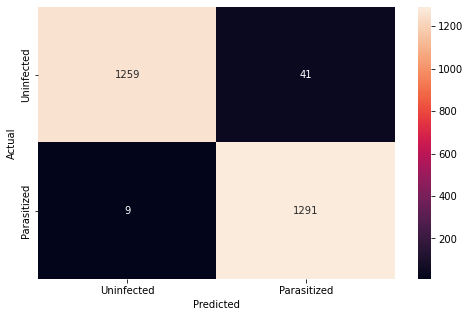

In [65]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [66]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

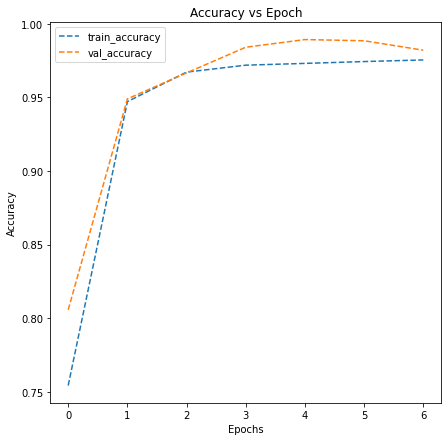

In [67]:
plot_accuracy(history)

Concluding remarks

The final model shows an increase in the false negative recall variable from 0.98 to 0.99 while maintaining a value of 0.98 in the f1-score variable, with respect to model 3.
With respect to the behavior of the accuracy as a function of epochs, a behavior without abrupt fluctuations is observed, which may suggest a certain ease of convergence with respect to models with the presence of fluctuations. 

Finally the decrease of layers to only 3 convolutional layers with 12770 trainable parameters and the use of Gaussian Blurring in the training images (resulting in the final model), gave the best results (based on the recall variable for false negatives 0.99 and f1-score of 0.98).
However, it is recommended that the VGG-16 transfer learning (ex. VGG-16) model be studied in greater depth to elucidate its advantages and limitations in this application.
